In [265]:
%matplotlib inline

from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import statsmodels.api as sm

# just for the sake of this blog post!
from warnings import filterwarnings
filterwarnings('ignore')

filepath = 'dataset'
X = pd.read_csv(filepath + '/dengue_features_train.csv')
Y = pd.read_csv(filepath + '/dengue_labels_train.csv')

T = pd.read_csv(filepath + '/dengue_features_test.csv')

X

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


## Encoding categorical data

In [266]:
# Ordinal 
# y['city']=y['city'].map({'iq':1,'sj':0})

city_features = pd.get_dummies(X['city'], prefix='city_')

# for testing set
city_features_t = pd.get_dummies(T['city'], prefix='city_')

city_features

,city__iq,city__sj
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [267]:
X = pd.concat([city_features, X], axis=1)

# for testing set
T = pd.concat([city_features_t, T], axis=1)

T

,city__iq,city__sj,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0,1,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,0,1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,0,1,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,0,1,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,0,1,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
5,0,1,sj,2008,23,2008-06-03,-0.044000,-0.030467,0.132000,0.083529,...,22.55,76.557143,71.17,16.667143,2.857143,28.000000,5.171429,32.8,25.0,27.7
6,0,1,sj,2008,24,2008-06-10,-0.044300,-0.024925,0.132271,0.159157,...,13.10,76.844286,48.99,17.010000,3.157143,27.400000,6.042857,31.1,23.3,91.7
7,0,1,sj,2008,25,2008-06-17,NaN,0.082150,0.144371,0.116729,...,7.20,76.870000,30.81,17.420000,3.900000,28.757143,6.985714,34.4,24.4,0.3
8,0,1,sj,2008,26,2008-06-24,0.010800,0.049900,0.100571,0.117329,...,17.10,77.395714,8.02,17.678571,2.785714,28.657143,6.242857,32.8,23.9,28.7
9,0,1,sj,2008,27,2008-07-01,0.072667,0.106660,0.155429,0.164900,...,11.90,78.534286,17.52,17.808571,2.228571,28.457143,4.628571,31.1,25.0,2.9


## Droping unwanted columns

In [268]:
dropping_columns = ['year','weekofyear','week_start_date','city']
X = X.drop(dropping_columns, axis=1)

# for testing set
T = T.drop(dropping_columns, axis=1)

X

,city__iq,city__sj,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0,1,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,0,1,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,0,1,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,0,1,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,0,1,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,0,1,NaN,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,0,1,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,...,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,0,1,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,...,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,0,1,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,...,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,0,1,NaN,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,...,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


## Filling NaN values

In [269]:
# X = X.interpolate()
X.fillna(method='bfill', inplace=True)

# for testing set
T.fillna(method='bfill', inplace=True)

X

,city__iq,city__sj,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0,1,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,0,1,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,0,1,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,0,1,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,0,1,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,0,1,0.112900,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,0,1,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,...,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,0,1,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,...,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,0,1,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,...,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,0,1,0.192875,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,...,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


## Normalizing

In [270]:
# X[X.columns] = StandardScaler().fit_transform(X)
X[X.columns] = MinMaxScaler().fit_transform(X)

# for testing set
T[T.columns] = MinMaxScaler().fit_transform(T)

X

,city__iq,city__sj,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0.0,1.0,0.578226,0.614835,0.386418,0.395544,0.031797,0.388291,0.354667,0.314680,...,0.056091,0.381614,0.031797,0.262659,0.086660,0.430091,0.210393,0.174194,0.486239,0.029450
1,0.0,1.0,0.629943,0.657063,0.321190,0.359233,0.058423,0.472710,0.441778,0.489213,...,0.031446,0.479668,0.058423,0.418164,0.069133,0.565350,0.163498,0.322581,0.688073,0.015829
2,0.0,1.0,0.479441,0.690881,0.311879,0.384430,0.088428,0.548064,0.496000,0.657583,...,0.045749,0.594415,0.088428,0.586900,0.064265,0.565350,0.173638,0.354839,0.743119,0.076201
3,0.0,1.0,0.584823,0.770066,0.438912,0.491150,0.039324,0.575260,0.539556,0.643471,...,0.024365,0.552387,0.039324,0.566808,0.073028,0.645897,0.198986,0.425806,0.788991,0.007362
4,0.0,1.0,0.658698,0.788882,0.481601,0.509943,0.019252,0.645515,0.593778,0.701541,...,0.021385,0.555396,0.019252,0.628226,0.112950,0.802432,0.429658,0.535484,0.844037,0.010676
5,0.0,1.0,0.567621,0.692949,0.487224,0.402314,0.024526,0.660246,0.606222,0.704947,...,0.046433,0.541468,0.024526,0.628553,0.050633,0.714286,0.214195,0.496774,0.844037,0.071968
6,0.0,1.0,0.567621,0.602837,0.398313,0.449123,0.008909,0.604344,0.538667,0.706569,...,0.067660,0.593120,0.008909,0.631003,0.046738,0.639818,0.198986,0.354839,0.788991,0.054666
7,0.0,1.0,0.523449,0.580542,0.301536,0.322386,0.386892,0.655146,0.576889,0.782157,...,0.052585,0.626820,0.386892,0.715943,0.014606,0.741641,0.280101,0.464516,0.743119,0.038837
8,0.0,1.0,0.556195,0.661456,0.254772,0.306916,0.049462,0.653447,0.580444,0.764801,...,0.065749,0.611947,0.049462,0.694544,0.036027,0.737082,0.253485,0.464516,0.743119,0.038837
9,0.0,1.0,0.655063,0.634412,0.318168,0.436481,0.036892,0.729556,0.670222,0.795783,...,0.049781,0.575518,0.036892,0.726723,0.044791,0.737082,0.176172,0.464516,0.889908,0.002025


## Correlation

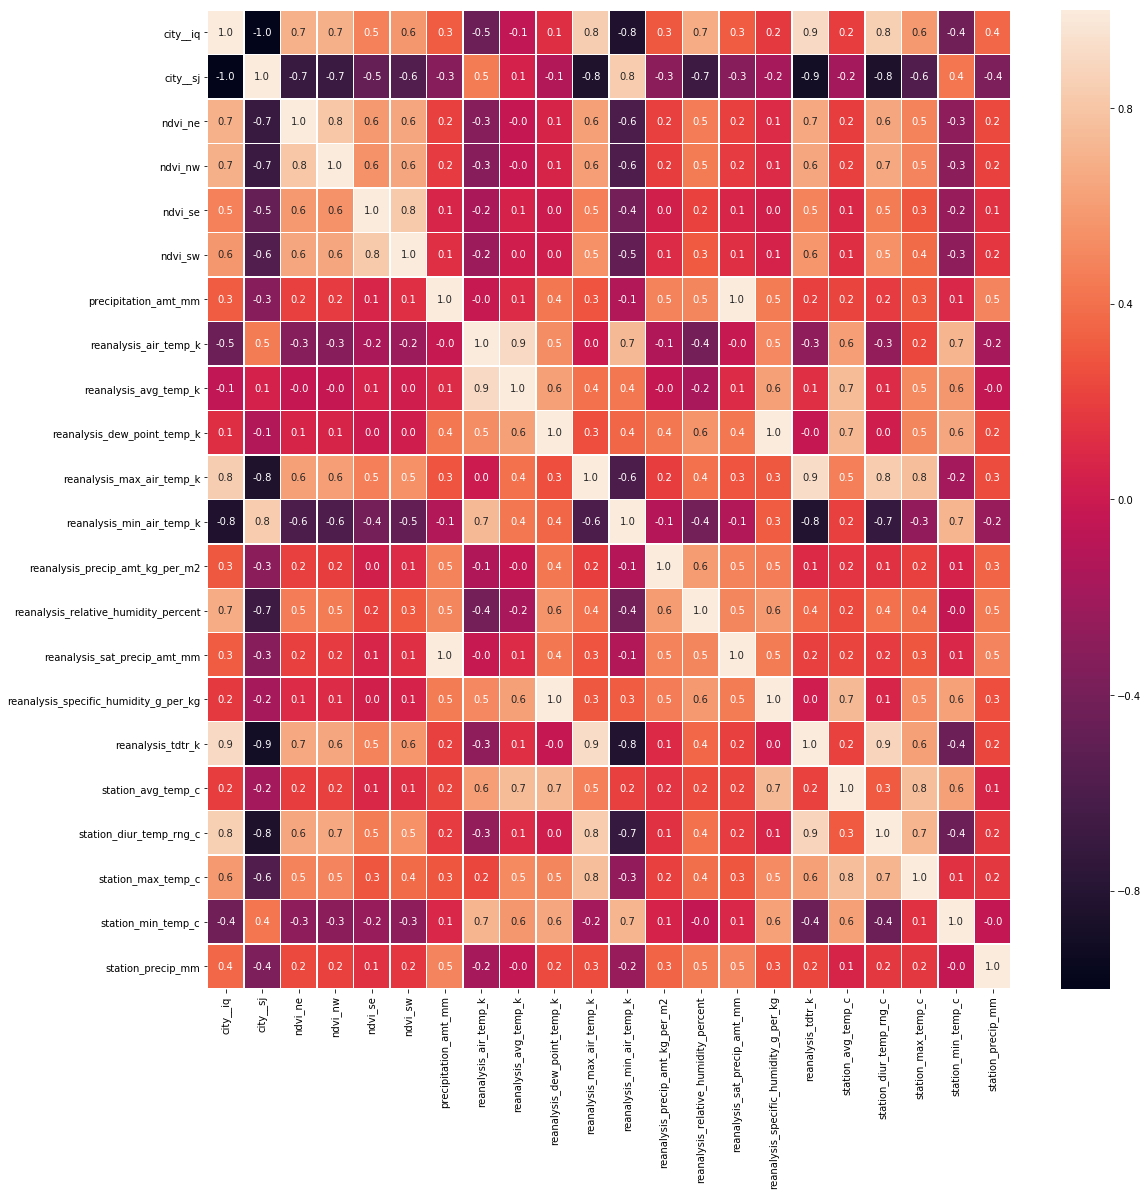

In [271]:
f,ax = plt.subplots(figsize=(18, 18))
sn.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Merging columns

In [272]:
X['combined_1'] = (X['precipitation_amt_mm'] + X['reanalysis_sat_precip_amt_mm']) / 2
X['combined_2'] = (X['reanalysis_specific_humidity_g_per_kg'] + X['reanalysis_dew_point_temp_k']) / 2

X = X.drop(['precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k'], axis=1)

# for testing set
T['combined_1'] = (T['precipitation_amt_mm'] + T['reanalysis_sat_precip_amt_mm']) / 2
T['combined_2'] = (T['reanalysis_specific_humidity_g_per_kg'] + T['reanalysis_dew_point_temp_k']) / 2
T = T.drop(['precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k'], axis=1)

X

,city__iq,city__sj,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,combined_1,combined_2
0,0.0,1.0,0.578226,0.614835,0.386418,0.395544,0.388291,0.354667,0.123457,0.692308,0.056091,0.381614,0.086660,0.430091,0.210393,0.174194,0.486239,0.029450,0.031797,0.288669
1,0.0,1.0,0.629943,0.657063,0.321190,0.359233,0.472710,0.441778,0.191358,0.730769,0.031446,0.479668,0.069133,0.565350,0.163498,0.322581,0.688073,0.015829,0.058423,0.453689
2,0.0,1.0,0.479441,0.690881,0.311879,0.384430,0.548064,0.496000,0.166667,0.800000,0.045749,0.594415,0.064265,0.565350,0.173638,0.354839,0.743119,0.076201,0.088428,0.622241
3,0.0,1.0,0.584823,0.770066,0.438912,0.491150,0.575260,0.539556,0.222222,0.776923,0.024365,0.552387,0.073028,0.645897,0.198986,0.425806,0.788991,0.007362,0.039324,0.605140
4,0.0,1.0,0.658698,0.788882,0.481601,0.509943,0.645515,0.593778,0.253086,0.815385,0.021385,0.555396,0.112950,0.802432,0.429658,0.535484,0.844037,0.010676,0.019252,0.664884
5,0.0,1.0,0.567621,0.692949,0.487224,0.402314,0.660246,0.606222,0.283951,0.861538,0.046433,0.541468,0.050633,0.714286,0.214195,0.496774,0.844037,0.071968,0.024526,0.666750
6,0.0,1.0,0.567621,0.602837,0.398313,0.449123,0.604344,0.538667,0.216049,0.830769,0.067660,0.593120,0.046738,0.639818,0.198986,0.354839,0.788991,0.054666,0.008909,0.668786
7,0.0,1.0,0.523449,0.580542,0.301536,0.322386,0.655146,0.576889,0.172840,0.884615,0.052585,0.626820,0.014606,0.741641,0.280101,0.464516,0.743119,0.038837,0.386892,0.749050
8,0.0,1.0,0.556195,0.661456,0.254772,0.306916,0.653447,0.580444,0.265432,0.830769,0.065749,0.611947,0.036027,0.737082,0.253485,0.464516,0.743119,0.038837,0.049462,0.729673
9,0.0,1.0,0.655063,0.634412,0.318168,0.436481,0.729556,0.670222,0.277778,0.907692,0.049781,0.575518,0.044791,0.737082,0.176172,0.464516,0.889908,0.002025,0.036892,0.761253


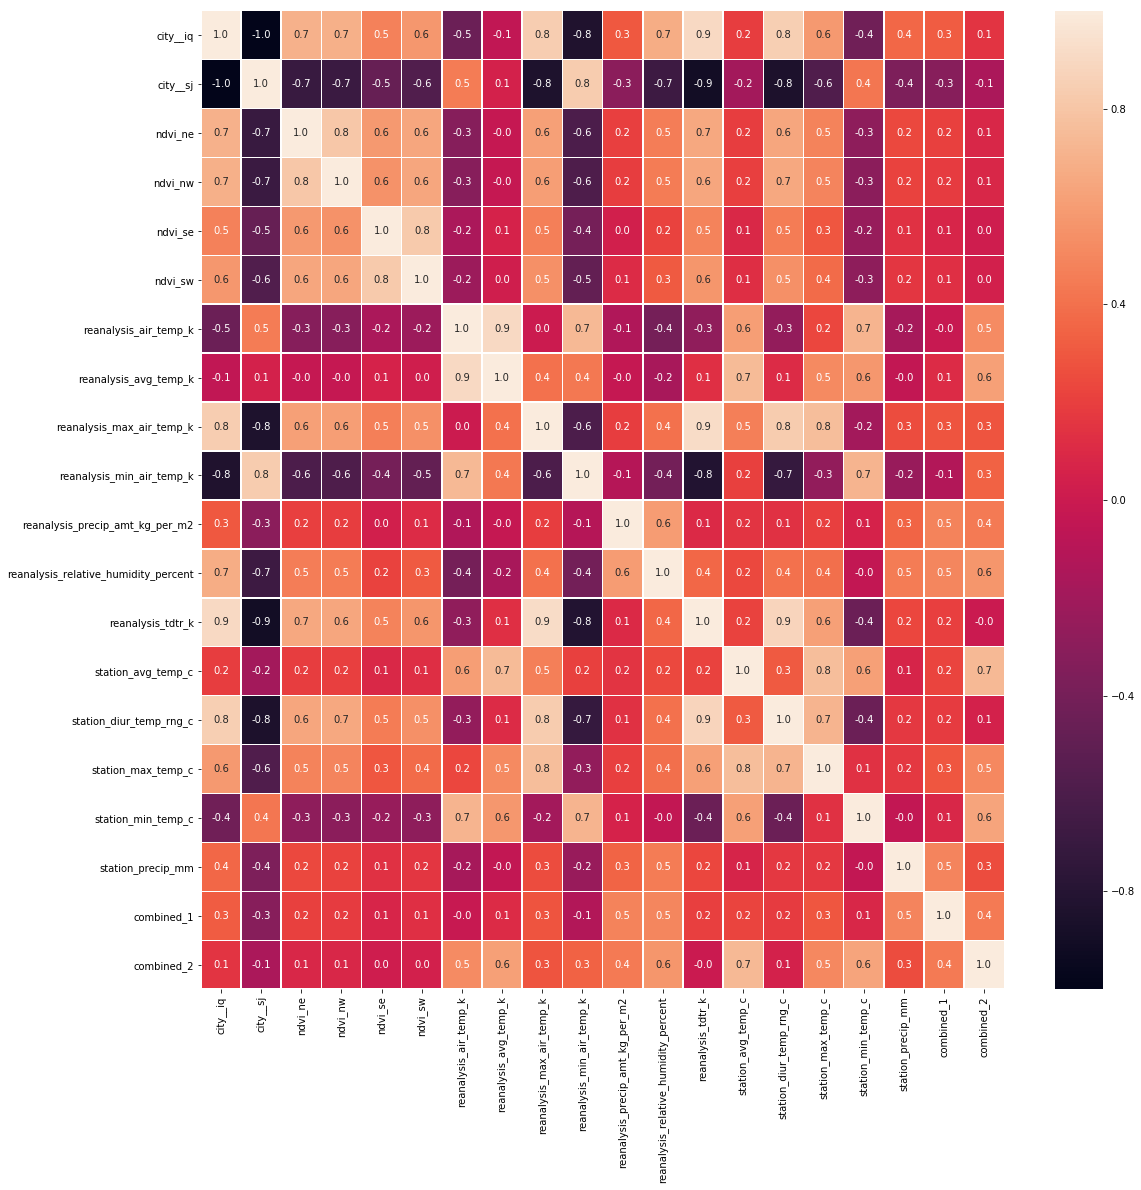

In [273]:
f,ax = plt.subplots(figsize=(18, 18))
sn.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Spliting test data set

In [274]:
# XTT = train_test_split(X, test_size=0.33, shuffle=False)
# X_train = XTT[0]
# X_test = XTT[1]

## Training Model

In [275]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=1000)
forest_model.fit(X, Y['total_cases'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [276]:
forest_predict = forest_model.predict(T)

## Write to CSV

In [279]:
# forest_predict_frame = pd.DataFrame((forest_predict).astype(int))
S = pd.read_csv(filepath + '/submission_format.csv')

S['total_cases'] = (forest_predict).astype(int)

S

S.to_csv(filepath + '/forest_test.csv', index=False)